In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn .svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [77]:
df=pd.read_csv(r'C:\Users\HP\Desktop\capstone data.csv')

In [78]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [79]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [50]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


<AxesSubplot:>

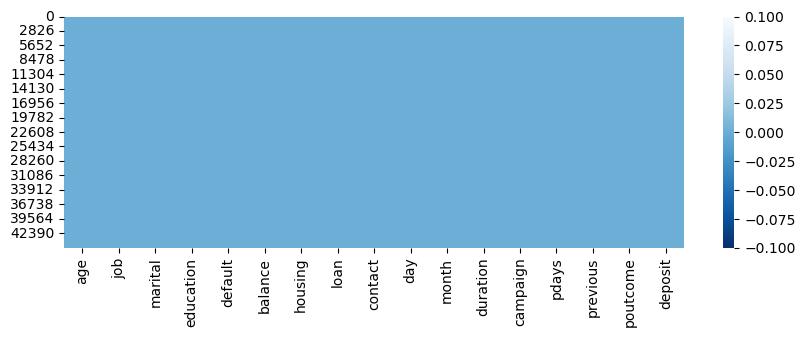

In [25]:
print(df.isnull().sum())

plt.figure(figsize=(10,3)) 
sns.heatmap(df.isnull(),cbar= True, cmap='Blues_r')

There are no missing data

The problem to be solved is the previous outcome of marketing campaigns seem to have been  very ineffective, this is because there was no customer segmentation, and therefore no proper market targeting to yield results for the bank

 EXPLORATORY DATA ANALYSIS
 UNIVARIATE

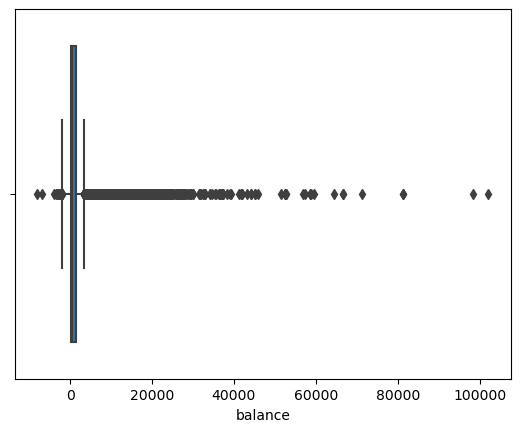

In [27]:
#Check for outliers
sns.boxplot(x=df['balance']);

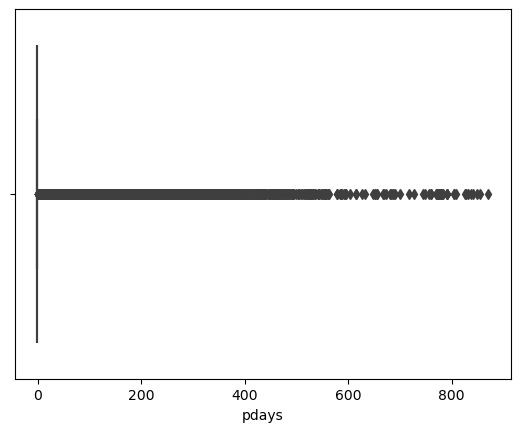

In [3]:
sns.boxplot(x=df['pdays']);

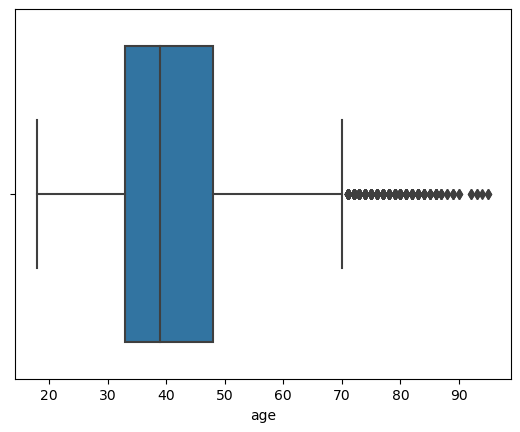

In [4]:
sns.boxplot(x=df['age']);

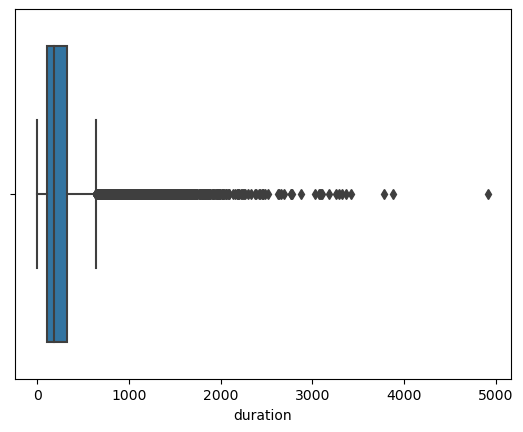

In [6]:
sns.boxplot(x=df['duration']);


There are several outliers in the account balance(age,balance,pdays,duration,campaign) the MinMax Scaler will be used to get the values between 0 and 1

In [15]:
#Group Customer Age
def age_group(x):
    if x <=25:
        return '<=25 Young Adult'
    elif x <= 40:
        return '25-40 Adult'
    elif x <=50:
        return '41-50 Old Adult'
    else :
        return '>=51 Elders'
    
    #Apply fuction to the data
df['age_group']= df['age'].apply(age_group)
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,>=51 Elders
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,41-50 Old Adult
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,25-40 Adult
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,41-50 Old Adult
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,25-40 Adult


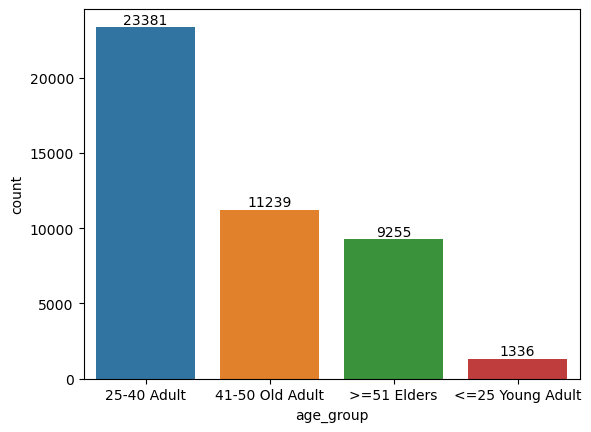

In [5]:

ax=sns.countplot(x=df['age_group'],order=df['age_group'].value_counts(ascending=False).index)
ax;
values=df['age_group'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=values);


The age_group categorized as Adult frm age 25-40years comprise of the highest number (23,381) of customers in Nexum bank,followed by the Old Adults from 41-50years having 11,239. The retired customers will fall under the Elders >51years comprise of 9,255, that number needs to at least double with effective campaign to the retired,to be able to increase the term deposit from the idle funds the retired category will have.

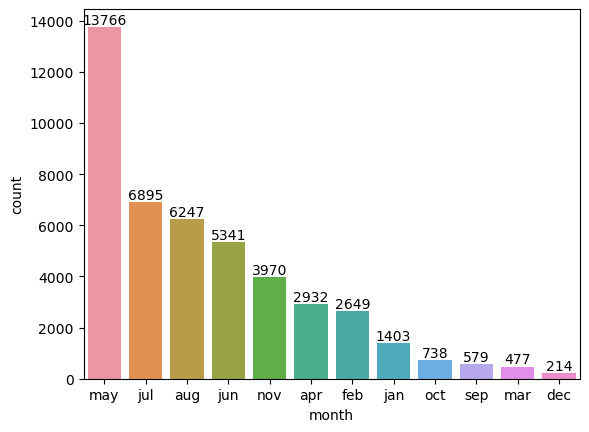

In [6]:
ax=sns.countplot(x=df['month'],order=df['month'].value_counts(ascending=False).index)
ax;
values=df['month'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=values);


The month of May has the highest number of customers contacted of 13,766,while the month of December due to the holiday season has least number of 214 customers

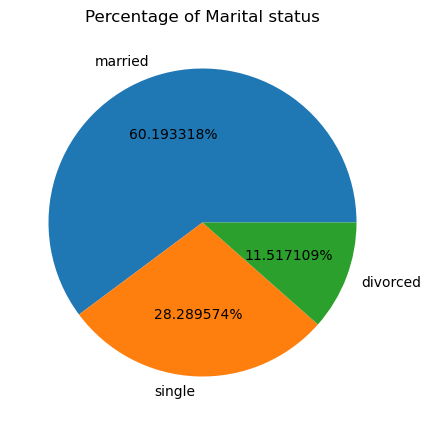

In [33]:
#Marital Status

fig,ax=plt.subplots(figsize=(5,5))
count= Counter(df['marital'])
ax.pie(count.values(),labels=count.keys(),autopct=lambda p:f'{p:2f}%')
ax.set_title('Percentage of Marital status')
plt.show();

The married customers have the majority percentage of 60%, while the single customers have a lower percentage of 28%, while the divorced customers have the lowest percentage of 11%.
The married and divorced customers would be more interested in housing loans unlike the singles. Hence they should be targetted for Housing loans.

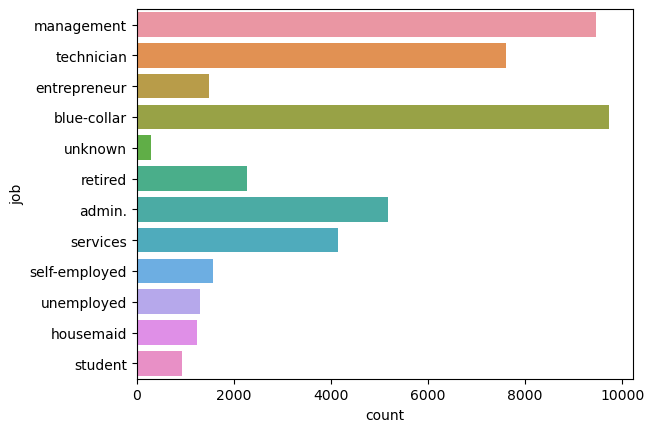

In [34]:
sns.countplot(y='job',data=df);


In [35]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

From the count plot with the jobs of the Nexum bank customers, it clearly shows they have majority of the customers 9,732 in number with blue collar jobs, followed by management jobs with 9,458 jobs. While the unknown job category with a count of 288 and 938 students are the least two jobs in the data provided. However it can be noticed that the Entrepreneurs and self employed have quite a low count of 1487 and 1579 respectively. These 2 job types need to be targeted and the numbers need to increase drastically , because jobs in this category will give the bank increased deposits as well as term deposits. The retired will definitely have funds they have worked for in their active years which they desire to put in the term deposits for interest purpose, I recommend their value count increases from 2,264 and the retired cutomers targeted for term deposit.

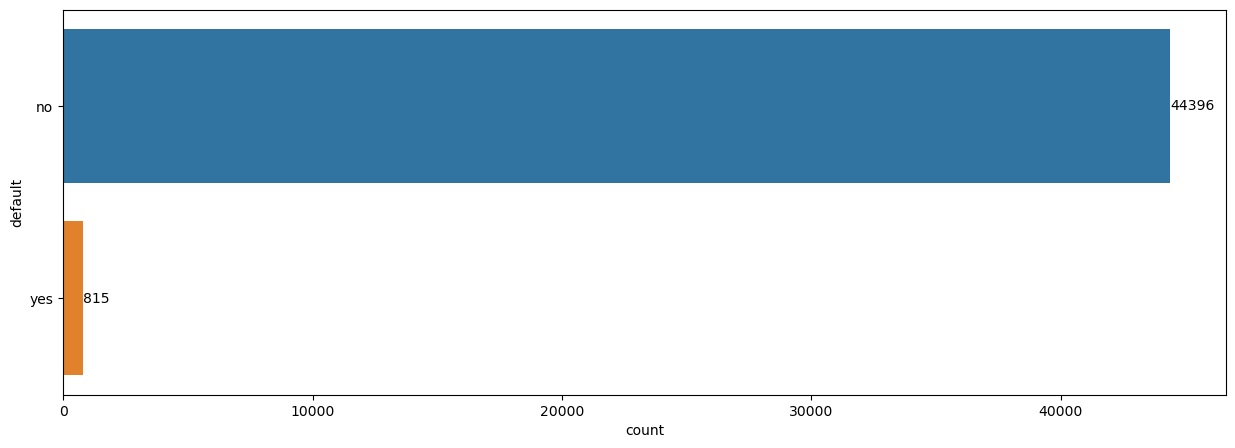

In [36]:
#Count of previous Defaults 
plt.figure(figsize= (15,5))

ax=sns.countplot(y=df['default'],order=df['default'].value_counts(ascending=False).index)
values=df['default'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=values);

Majority of the customers 44,396 have never defaulted on any loan previously. This category of customers should be targeted for housing loans,personal loans , while the 815 customers who have defaulted can be targeted for savings deposits and other products that are not loan inclined to boost the profit margin of the bank.

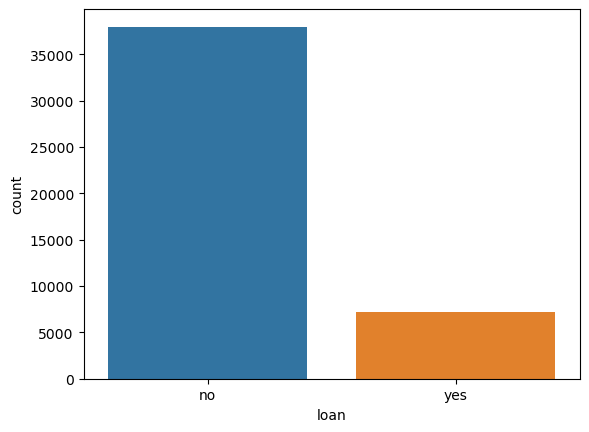

In [7]:
sns.countplot(x='loan',data=df);

Majority of customers,over 35,000 do not have a personal loan in Nexum bank and need to be targeted in the next market campaigns

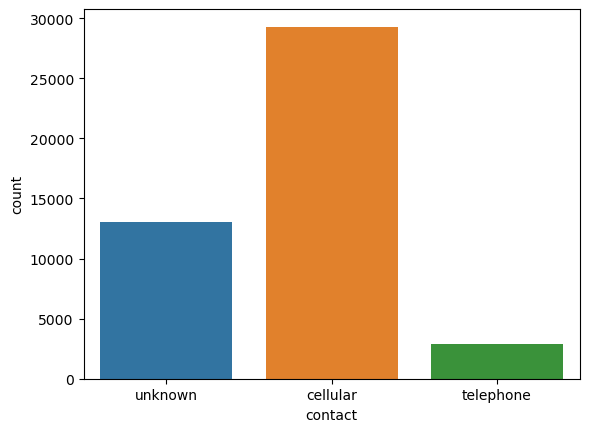

In [7]:
sns.countplot(x='contact',data=df);

The contacts made shows most customers about 29,000 were contacted with their cellular phones, while about 14,000 were contacted with unknown sources and about 2500 were contacted with telephones,the unknown sources has to do with poor data collection on the previous campaign, and could be a reason for the low success rate.
I will recommend other forms of concts such as emails,text messages, instant messages on the mobile apps

In [ ]:
#BIVARIATE ANAYSIS

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

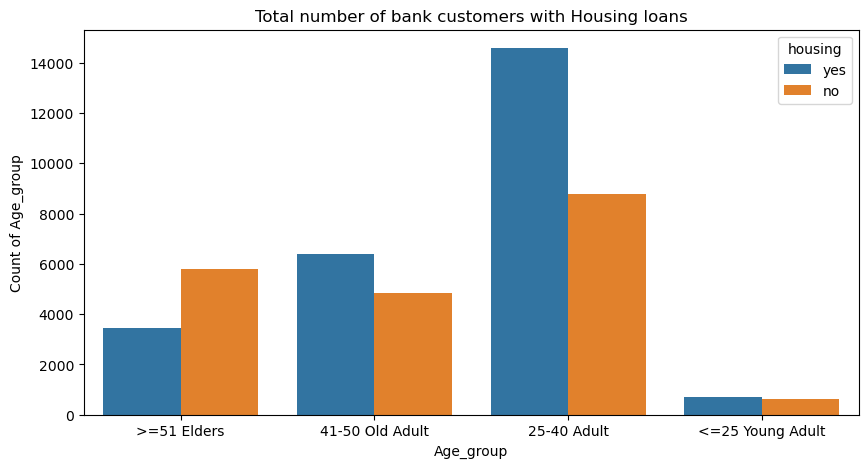

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(x='age_group',data=df,hue='housing')
plt.xlabel('Age_group')
plt.ylabel('Count of Age_group')
plt.title('Total number of bank customers with Housing loans');

The age_group Adults (25-40years) has the highest number of bank customers, and have the highest housing loans with over 14,000. The over 9000 Adults without Housing loans should be targetted in market campaigns

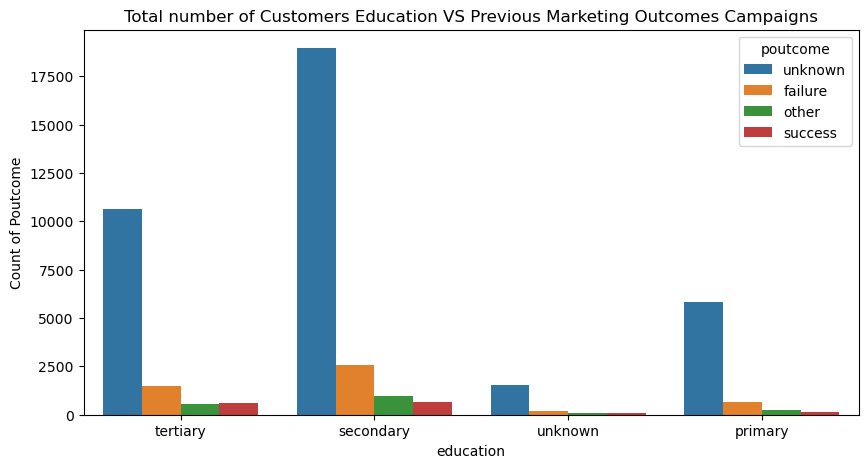

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(x='education',data=df,hue='poutcome')
plt.xlabel('education')
plt.ylabel('Count of Poutcome')
plt.title('Total number of Customers Education VS Previous Marketing Outcomes Campaigns');

The previous outcome of marketing campaigns seem to have been ineffective, this is because the success rate across all education levels was extremely low, unlike the unknown category which had d highest count under secondary education.
In order to ensure a better marketing campaign outcome,proper targeting  and customer segmentation needs to be done

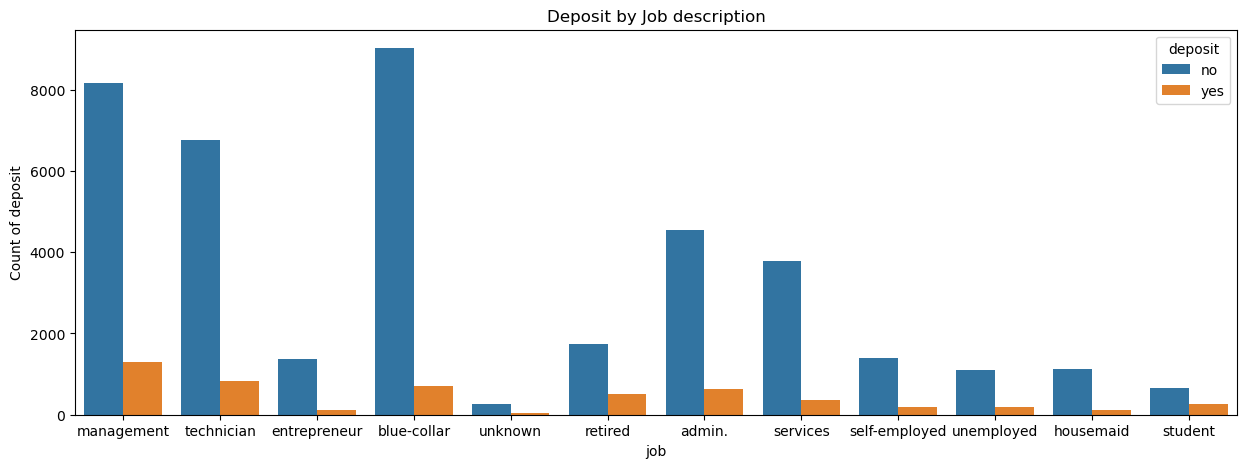

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(x='job',data=df,hue='deposit')
plt.xlabel('job')
plt.ylabel('Count of deposit')
plt.title('Deposit by Job description');

This clearly shows the low count of term deposit by all the job categories.The top 3 well paid jobs the blue-collar, technician, and the management need to be targeted for deposits in the next market campaign . 

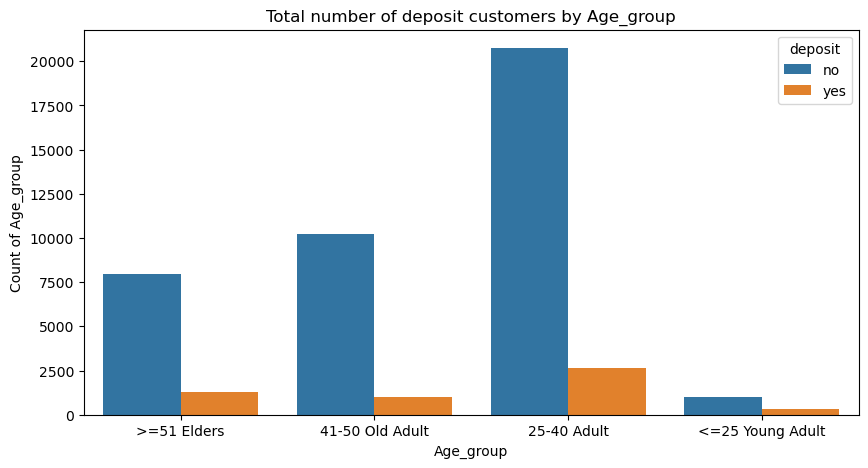

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='age_group',data=df,hue='deposit')
plt.xlabel('Age_group')
plt.ylabel('Count of Age_group')
plt.title('Total number of deposit customers by Age_group');

The Adults,Old Adults and the Elders have the highest counts of customers with no term deposits, with only a small fraction of less than 2500 with term deposits in the respective age groups.

In [ ]:
#Multivarite Analysis

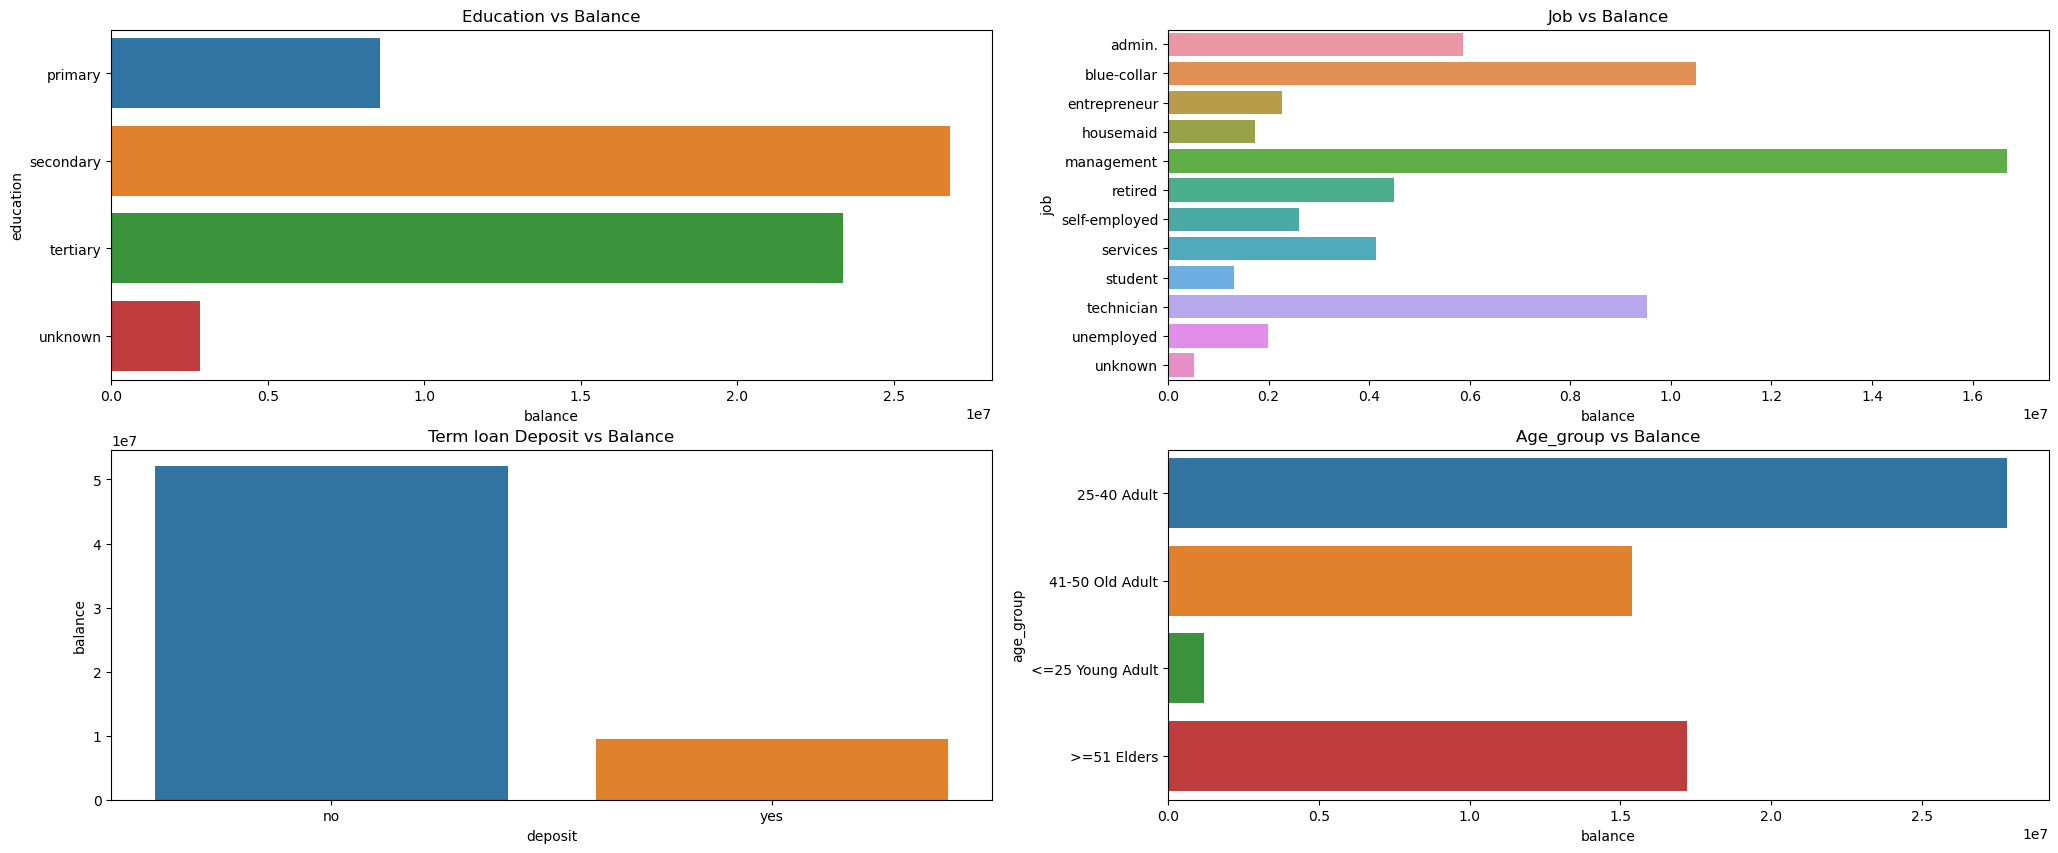

In [51]:
fig,axs=plt.subplots(nrows=2, ncols=2, figsize=(25,10))

ed_bal= df.groupby('education')['balance'].sum().reset_index()
sns.barplot(y='education',data=ed_bal,x='balance',ax=axs[0,0])
axs[0,0].set_title('Education vs Balance');

jo_bal= df.groupby('job')['balance'].sum().reset_index()
sns.barplot(y='job',data=jo_bal,x='balance',ax=axs[0,1])
axs[0,1].set_title('Job vs Balance');

dep_bal= df.groupby('deposit')['balance'].sum().reset_index()
sns.barplot(x='deposit',data=dep_bal,y='balance',ax=axs[1,0])
axs[1,0].set_title('Term loan Deposit vs Balance');

age_bal= df.groupby('age_group')['balance'].sum().reset_index()
sns.barplot(y='age_group',data=age_bal,x='balance',ax=axs[1,1])
axs[1,1].set_title('Age_group vs Balance');



From this Bivariate analysis, the first graph depicits  the relationship btw education level of the customers and their account balance. It shows that customers with secondary level education seem to have the highest balance in their account , with those with tertiary education having the next highest balance. A marketing campaign should be targeted at secondary and tertiary schools to open accounts for this 2 categories of education with idle funds, also profer personal loans, student loans to them.

The next graph shows us the relationship btw the jobs and account balance. Management , blue collar and technicians seem to have the 3 highest account balances.This jobs seem to have high compensation and the bank needs to have effective market campaigns to attract them into their books. 

The third graph tells us that those with high account balances do not seem to be interested in term deposits, while those with lower balance subscribe more to term deposit. Nexum bank needs to run effective mrketing campaigns to turn the high idle funds into term deposits customers.

The last graph is the age grp vs their balances.The active working Adults 25-40yrs have the highest bank balances,the various loans (housing,personal, business) should be targetted to this set of customers, next is the Elders >51 which should be retirees, and should be targeted for the term deposits, as well as the Old adults.

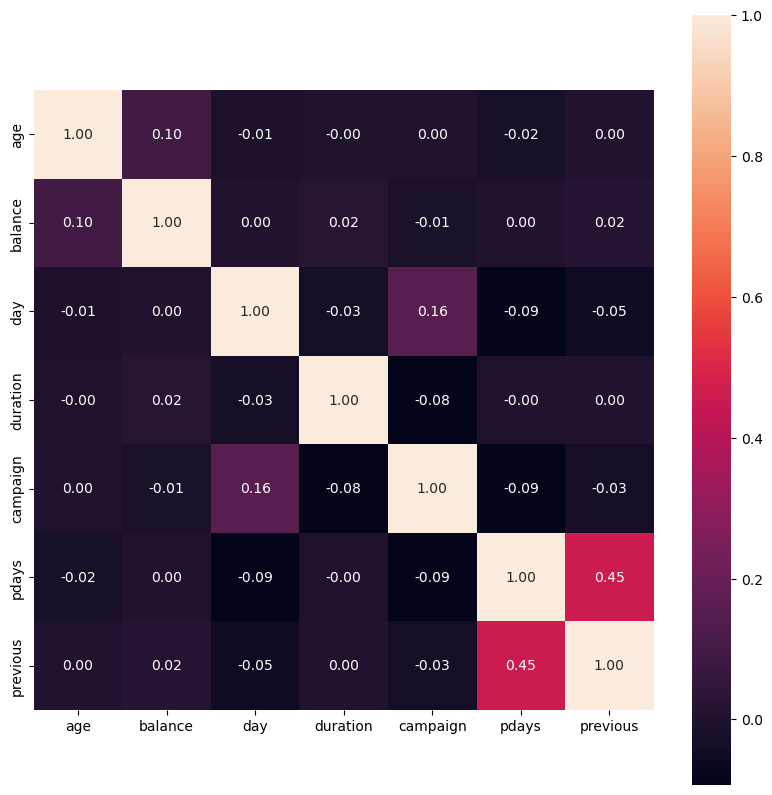

In [52]:
plt.figure(figsize=(10,10))

hm = sns.heatmap(df.corr(), cbar=True,annot=True, square=True,fmt='.2f',
                annot_kws={'size':10})

The correlation on the heatmap shows various negative correlation btw most of the variables, the pdays and previous seem to have moderate positive correlations of 0.45

 Data Pre-processing & Feature Engineering

In [27]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [28]:
#Feature Engineering

In [80]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

Categorical data previously on the table has been changed to numerical data with one hot encoding thereby increasing the columns.

In [83]:
from sklearn.preprocessing import LabelEncoder

#Label Encoder
encoder = LabelEncoder()

for c in df.columns[1:]:
    if(df[c].dtype== 'object'):
        df[c]= encoder.fit_transform(df[c])
    else:
        df[c] = df[c]
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [84]:
df1= df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit']]

label= df[['deposit']]

In [85]:
df1.dtypes

age          int64
job          int32
marital      int32
education    int32
default      int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
month        int32
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
deposit      int32
dtype: object

In [17]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [86]:
#Dealing with outliers- age, balance,pdays,duration

#Using MinMax Scaler to normalize the data
scaler = MinMaxScaler()

df1['scaled_age']= scaler.fit_transform(df1['age'].values.reshape(-1,1))
df1['scaled_balance']= scaler.fit_transform(df1['balance'].values.reshape(-1,1))
df1['scaled_pdays']= scaler.fit_transform(df1['pdays'].values.reshape(-1,1))
df1['scaled_duration']= scaler.fit_transform(df1['duration'].values.reshape(-1,1))

df1.drop(['age','balance','pdays','duration'] ,axis=1, inplace=True)

df1.head()






,job,marital,education,default,housing,loan,contact,day,month,campaign,previous,poutcome,deposit,scaled_age,scaled_balance,scaled_pdays,scaled_duration
0,4,1,2,0,1,0,2,5,8,1,0,3,0,0.519481,0.092259,0.0,0.053070
1,9,2,1,0,1,0,2,5,8,1,0,3,0,0.337662,0.073067,0.0,0.030704
2,2,1,1,0,1,1,2,5,8,1,0,3,0,0.194805,0.072822,0.0,0.015453
3,1,1,3,0,1,0,2,5,8,1,0,3,0,0.376623,0.086476,0.0,0.018707
4,11,2,3,0,0,0,2,5,8,1,0,3,0,0.194805,0.072812,0.0,0.040260


The outliers found has been dropped.

In [12]:
#Select target variable
y=df['balance']
y


0        2143
1          29
2           2
3        1506
4           1
         ... 
45206     825
45207    1729
45208    5715
45209     668
45210    2971
Name: balance, Length: 45211, dtype: int64

In [ ]:
Machine Learning

In [17]:
#Split the data into training and testing set
x_train,x_test,y_train,y_test = train_test_split(df1,label,test_size=0.2, random_state=42)

In [18]:
df1.shape

(45211, 16)

In [19]:
x_train

,job,marital,education,default,housing,loan,contact,day,month,campaign,previous,poutcome,scaled_age,scaled_balance,scaled_pdays,scaled_duration
3344,1,1,0,0,1,0,2,15,8,1,0,3,0.298701,0.080511,0.000000,0.014640
17965,9,1,0,0,1,0,0,30,5,2,0,3,0.402597,0.085650,0.000000,0.054697
18299,0,1,1,0,0,0,0,31,5,4,0,3,0.311688,0.107684,0.000000,0.026434
10221,4,2,2,0,1,0,2,11,6,11,0,3,0.246753,0.071723,0.000000,0.076251
32192,1,1,0,0,0,0,0,15,0,2,0,3,0.493506,0.104561,0.000000,0.053680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,3,2,0,0,0,0,2,18,6,1,0,3,0.337662,0.082418,0.000000,0.425580
44732,8,2,2,0,0,0,0,8,11,1,1,0,0.064935,0.077415,0.106651,0.042700
38158,9,0,2,0,1,0,0,15,8,1,0,3,0.207792,0.084760,0.000000,0.048597
860,5,1,1,0,0,0,2,7,8,1,0,3,0.194805,0.074301,0.000000,0.022570


The x train is like the question

In [20]:
y_train

,deposit
3344,0
17965,0
18299,0
10221,0
32192,1
...,...
11284,1
44732,0
38158,0
860,0


The y train is the answer to the question.

In [21]:
#Linear Regression

lr = LinearRegression()

#Fit model
lr.fit(x_train,y_train)

#Make Prediction
lr_pred= lr.predict(x_test)


In [22]:
#Evalute performance of my model

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [23]:
mae= mean_absolute_error(y_test,lr_pred)
mse= mean_squared_error(y_test,lr_pred)
r_square= r2_score(y_test,lr_pred)

print(mae)
print(mse)
print(r_square)

0.18297863649091475
0.08315980805609413
0.2161419587110035


The Linear Regressor performed poorly because the r_square is at its best when its gets to 1

In [24]:
#Using other Regression models

dr= DecisionTreeRegressor()
rr=RandomForestRegressor()
lr = LinearRegression()

#Create list of model names
models=[lr,dr,rr]

In [25]:
#Create function to train a model and evaluate
def trainer(model,x_train,y_train,x_test,y_test):
    #fit your model
    model.fit(x_train,y_train)
    #predict on the fitted model
    prediction = model.predict(x_test)
    #print evaluation metric
    print('\nfor {}, Mean Absolute Error is {} \n'.format(model.__class__.__name__,mean_absolute_error(prediction,y_test)))
    print('\nfor {}, Mean Squared Error is {} \n'.format(model.__class__.__name__,mean_squared_error(prediction,y_test)))
    print('\nfor {}, R_Square is {} \n'.format(model.__class__.__name__,r2_score(prediction,y_test)))
    print('.........................................................................................................')
    

In [26]:
#Loop through each model, training in the process
for model in models:
    trainer(model,x_train,y_train,x_test,y_test)


for LinearRegression, Mean Absolute Error is 0.18297863649091475 


for LinearRegression, Mean Squared Error is 0.08315980805609413 


for LinearRegression, R_Square is -2.8543056406076928 

.........................................................................................................

for DecisionTreeRegressor, Mean Absolute Error is 0.1256220280880239 


for DecisionTreeRegressor, Mean Squared Error is 0.1256220280880239 


for DecisionTreeRegressor, R_Square is -0.17299145221070944 

.........................................................................................................

for RandomForestRegressor, Mean Absolute Error is 0.1309145195178591 


for RandomForestRegressor, Mean Squared Error is 0.06644206568616609 


for RandomForestRegressor, R_Square is -0.5429846744649318 

.........................................................................................................


The Linear Regression,Forest Regressor and the Decision Tree Regressor performed poorly too, with the r square having a negative value.

In [27]:
logreg=LogisticRegression()

logreg.fit(x_train, y_train)

ly_pred=logreg.predict(x_test)

print('Logistic Regression')
print('Accuracy:',accuracy_score(y_test,ly_pred))
print('Precision:',precision_score(y_test,ly_pred))
print('Recall:',recall_score(y_test,ly_pred))
print('F1-score:',f1_score(y_test,ly_pred))
print('AUC-ROC:',roc_auc_score(y_test,ly_pred))


Logistic Regression
Accuracy: 0.8869844078292602
Precision: 0.6
Recall: 0.18973418881759854
F1-score: 0.28830083565459613
AUC-ROC: 0.5861900320345538


The Logistics Regression performed better than the Linear Regression,Forest Regressor and the Decision Tree Regressor with accuracy at 0.88

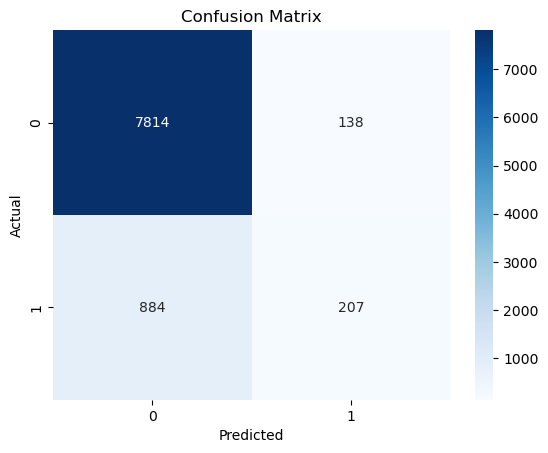

In [28]:
#Confusion matrix

lcm= confusion_matrix(y_test, ly_pred)

#Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap= 'Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

For the Confusion Matrix , the bank predicted 7814 customers subscribed, and they actually subscribed to term deposits as its (True positive),It incorrectly predicted 884 customers did not subscribe to deposits, meanwhile they actually subscribed which is (False positive). It predicted 207 customers did not subscribe to the deposits , but they actually subscribed(True Negative). The 138 customers did not subscribe for deposit and it was predicted that they didnt subscribe for deposit.

In [29]:
df.shape

(45211, 17)

In [26]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [44]:
classifiers= [[XGBClassifier(), 'XGB Classifier'],
             [RandomForestClassifier(), 'Random Forest'],
             [KNeighborsClassifier(), 'K-Nearest Neighbours'],
             [SGDClassifier(), 'SGD Classifier'],
             [GaussianNB(), 'Naive Bayes'],
             [DecisionTreeClassifier(random_state=42), 'Decision tree'],
             [LogisticRegression(), 'Logistic Regression']
             ]
acc_list ={}
precision_list= {}
recall_list = {}
roc_list = {}
               
for classifier in classifiers:
               
        model = classifier[0]
        model.fit(x_train, y_train)
        model_name = classifier[1]
               
        pred= model.predict(x_test)
               
        a_score = accuracy_score(y_test, pred)
        p_score = precision_score(y_test, pred)
        r_score = recall_score(y_test, pred)
        roc_score = roc_auc_score(y_test, pred)
        
        acc_list[model_name] = ([str(round(a_score*100, 2))+ '%'])
        precision_list[model_name] = ([str(round(p_score*100, 2))+ '%'])
        recall_list[model_name] = ([str(round(r_score*100, 2))+ '%'])
        roc_list[model_name] = ([str(round(roc_score*100, 2))+ '%'])
               
        if model_name != classifiers[-1][1]:
            print('')
        
        
        

In [45]:
acc_list

{'XGB Classifier': ['90.78%'],
 'Random Forest': ['90.19%'],
 'K-Nearest Neighbours': ['88.28%'],
 'SGD Classifier': ['88.68%'],
 'Naive Bayes': ['82.48%'],
 'Decision tree': ['87.32%'],
 'Logistic Regression': ['88.7%']}

From the models the XGB Classifier performed the best with 90.78% and should be adopted, followed closely by is the Random Forest ,while the Naive Bayes had the least performance.

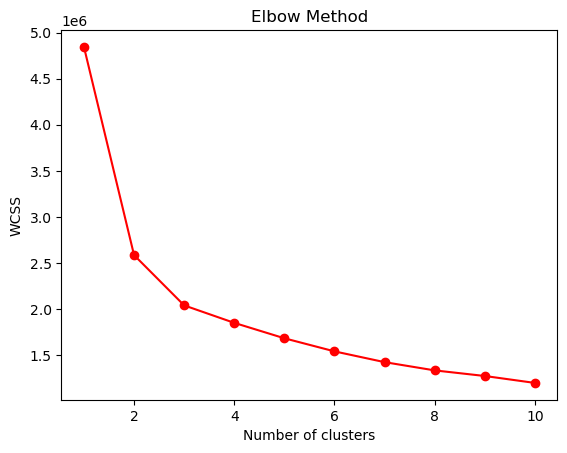

In [87]:
#Determine the optimum numbers of clusters

wcss =[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, color='red', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

For the K-Clustering using the elbow method, the  optimal number of clusters would be around 3

In [97]:
#Fit K-meams clustering model
kmeans= KMeans(n_clusters=3, init='k-means++',random_state=42)
kmeans.fit(df)

#Add cluster labels to data
df['Cluster'] = kmeans.labels_

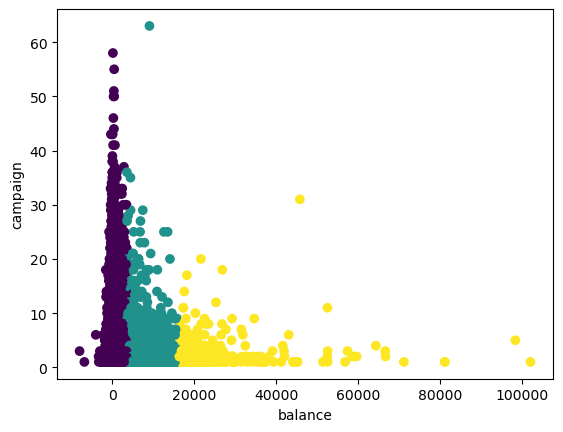

In [98]:
#Visualize cluster results
plt.scatter(df['balance'], df['campaign'],c= df['Cluster'], label='Centroids')
plt.xlabel('balance')
plt.ylabel('campaign')
plt.show()

#Calculate silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(df, kmeans.labels_);

This shows clusters of contacts made to customers during this marketing campaign vs their bank balance. The highest number of customers contacted for the campaign barely had any balance in their acct.This category of people are most likely banking with other banks aside Nexum or have dormant/inactive accounts. Such customers need to be encouraged to return back to Nexum bank with attractive offers,rates and possibly loans to keep them in NEXUM bank and grow their balances. While the cluster with higher balances are fewer and were not really contacted during the campaign, that shouldnt be the case because those wih higher balances can be targeted foe term deposits and housing loans.